<a href="https://colab.research.google.com/github/ewarren38/HW4_WarrenE/blob/main/HW4_WarrenE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Eleanor Warren

Class: ST554-601

Date: 2.10.26

Purpose: Homework 4

#Bring in Homework 3 Code


###Read in the Data

In [ ]:
# Read in data using a URL
import pandas as pd
student_data = pd.read_csv("https://www4.stat.ncsu.edu/online/datasets/StudentData.txt", sep = ";")

# View first few observations
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


###Summarize (Categorical)

In this first table, 281 represents the number of students in this dataset that belong to a family of size greater than 3 people.

In [4]:
# One-way contingency table
student_data.famsize.value_counts()

,count
famsize,
GT3,281
LE3,114


Below is a two-way contingency table. We see that 65 of the female students in this dataset chose to attend this school because of its reputation.

In [5]:
# Two-way contingency table
pd.crosstab(student_data.reason, student_data.sex,
            margins = True,
            rownames = ["Reason for Choice"],
            colnames = ["Sex"])


Sex,F,M,All
Reason for Choice,,,
course,72,73,145
home,53,56,109
other,18,18,36
reputation,65,40,105
All,208,187,395


Next, let's make a three-way contingency table. We see that the number of students in this dataset that chose the school for reputation, participate in extra-curricular activities, and are female is 36.

In [22]:
# Three-way contingency table
my_tab = pd.crosstab([student_data.reason, student_data.activities], student_data.sex,
            margins = True,
            rownames = ["Reason for Choice", "Extra-curricular Activity"],
            colnames = ["Sex"]
            )
my_tab

Sex                                            F    M  All
Reason for Choice Extra-curricular Activity               
course            no                          41   36   77
                  yes                         31   37   68
home              no                          31   27   58
                  yes                         22   29   51
other             no                          11    8   19
                  yes                          7   10   17
reputation        no                          29   11   40
                  yes                         36   29   65
All                                          208  187  395

Using `.loc`, we subset the data frame first by students who are female, and then cross tabulate the number of those female students across their reason for attending and whether or not they participate in extra-curricular activities.

In [9]:
# Create a conditional two-way table by subsetting the data with .loc
pd.crosstab(student_data.loc[student_data["sex"]=="F"].reason,
            student_data.loc[student_data["sex"]=="F"].activities,
            margins = True,
            rownames = ["Reason for Choice"],
            colnames = ["Extra-curricular Activity"])

Extra-curricular Activity,no,yes,All
Reason for Choice,,,
course,41,31,72
home,31,22,53
other,11,7,18
reputation,29,36,65
All,112,96,208


Another way we can make a conditional two-way table is by taking the three-way table of sex/reason/activites, and selecting the column of that table that is specifically reporting the results for females `["F"]`

In [10]:
# Create a conditional two-way table by using my three-way table and subsetting it
# Use the three-way table that I created above and saved as my_tab
my_tab["F"]

Reason for Choice  Extra-curricular Activity
course             no                            41
                   yes                           31
home               no                            31
                   yes                           22
other              no                            11
                   yes                            7
reputation         no                            29
                   yes                           36
All                                             208
Name: F, dtype: int64

###Summarize (Numerical)

Now, we want to undestand the measures of center and spread for the variables age, G1 (first period grade) and G3 (final grade).

In [23]:
# Key variables are age, absences, G1, G2, G3
# Find measures of center and spread for age, G1, and G3
student_data[["age", "G1", "G3"]] \
      .agg(["mean", "median", "std"])

,age,G1,G3
mean,16.696203,10.908861,10.415190
median,17.000000,11.000000,11.000000
std,1.276043,3.319195,4.581443


In [16]:
student_data[["age", "G1", "G3"]] \
      .quantile(q = [0.25, 0.5, 0.75, 0.95])

,age,G1,G3
0.25,16.0,8.0,8.0
0.50,17.0,11.0,11.0
0.75,18.0,13.0,14.0
0.95,19.0,16.0,17.0


We can find these same statistics, this time subsetting for students who are female.

In [24]:
# Find measures of center and spread for age, G1, and G3, subsetting for sex = Female
student_data.loc[student_data["sex"] == "F", ["age", "G1", "G3"]] \
      .agg(["mean", "median", "std"])

,age,G1,G3
mean,16.730769,10.620192,9.966346
median,17.000000,10.000000,10.000000
std,1.201696,3.232530,4.622338


In [18]:
student_data.loc[student_data["sex"] == "F", ["age", "G1", "G3"]] \
      .quantile(q = [0.25, 0.5, 0.75, 0.95])

,age,G1,G3
0.25,16.0,8.0,8.0
0.50,17.0,10.0,10.0
0.75,18.0,13.0,13.0
0.95,19.0,16.0,16.0


These statistics are done across the variable "sex", so they show statistics separated by female and male students. We see that the average scores for both G1 and G3 are higher in this dataset for males.

In [25]:
# Find measures of center and spread for age, G1, and G3, across sex
student_data.groupby("sex")[["age", "G1", "G3"]] \
      .agg(["mean", "median", "std"])

age                          G1                          G3         \
          mean median       std       mean median       std       mean median   
sex                                                                             
F    16.730769   17.0  1.201696  10.620192   10.0  3.232530   9.966346   10.0   
M    16.657754   16.0  1.356181  11.229947   11.0  3.392839  10.914439   11.0   

               
          std  
sex            
F    4.622338  
M    4.495297

In [19]:
student_data.groupby("sex")[["age", "G1", "G3"]] \
      .quantile(q = [0.25, 0.5, 0.75, 0.95])

age    G1    G3
sex                       
F   0.25  16.0   8.0   8.0
    0.50  17.0  10.0  10.0
    0.75  18.0  13.0  13.0
    0.95  19.0  16.0  16.0
M   0.25  16.0   9.0   9.0
    0.50  16.0  11.0  11.0
    0.75  18.0  14.0  14.0
    0.95  19.0  17.0  18.0

We can group by two variables, so now we group by both sex and whether or not they particiapte in extra-curricular activities. We see that for both scores, females who participated in extra-curricular activities had a lower scores than females who didn't, and males who participated in extra-curricular activities had higher scores than those who didn't.

In [21]:
# Find measures of center and spread for age, G1, and G3, across sex and activities
student_data.groupby(["sex", "activities"])[["age", "G1", "G3"]] \
      .agg(["mean", "median", "std"])

age                          G1                   \
                     mean median       std       mean median       std   
sex activities                                                           
F   no          16.794643   17.0  1.178932  10.812500   11.0  3.481046   
    yes         16.656250   17.0  1.229704  10.395833   10.0  2.918107   
M   no          16.878049   17.0  1.558650  10.585366   10.5  3.355302   
    yes         16.485714   16.0  1.152875  11.733333   11.0  3.351999   

                       G3                   
                     mean median       std  
sex activities                              
F   no          10.464286   11.0  4.378343  
    yes          9.385417   10.0  4.850111  
M   no          10.170732   11.0  4.655555  
    yes         11.495238   12.0  4.299203

In [20]:
student_data.groupby(["sex", "activities"])[["age", "G1", "G3"]] \
      .quantile(q = [0.25, 0.5, 0.75, 0.95])

age     G1     G3
sex activities                          
F   no         0.25  16.00   8.00   8.00
               0.50  17.00  11.00  11.00
               0.75  18.00  13.25  13.00
               0.95  19.00  16.45  17.00
    yes        0.25  16.00   8.00   8.00
               0.50  17.00  10.00  10.00
               0.75  18.00  13.00  13.00
               0.95  19.00  16.00  15.25
M   no         0.25  15.25   8.00   8.00
               0.50  17.00  10.50  11.00
               0.75  18.00  13.00  13.00
               0.95  19.00  16.00  16.00
    yes        0.25  16.00   9.00   9.00
               0.50  16.00  11.00  12.00
               0.75  17.00  15.00  14.00
               0.95  18.00  17.00  18.00

Lastly, we include a correlation matrix. This shows us, for example that absences are negatively correlated with G1, meaning there is a relationship in the data that indicates that more absences is associated with worse scores on G1.

In [26]:
# Correlation matrix
student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


#Task 1
###Categorical Variables

First, let's make a stacked bar chart that counts how many students want to pursue higher education, across sex.

In [31]:
# Use crosstab to get counts for each category saved in a DataFrame
bar_table = pd.crosstab(student_data["sex"], student_data["higher"])
print(type(bar_table)) # pandas DataFrame
bar_table

<class 'pandas.core.frame.DataFrame'>


higher,no,yes
sex,,
F,4,204
M,16,171


Text(0.5, 1.0, "Students' Desire to Pursue Higher Education by Sex")

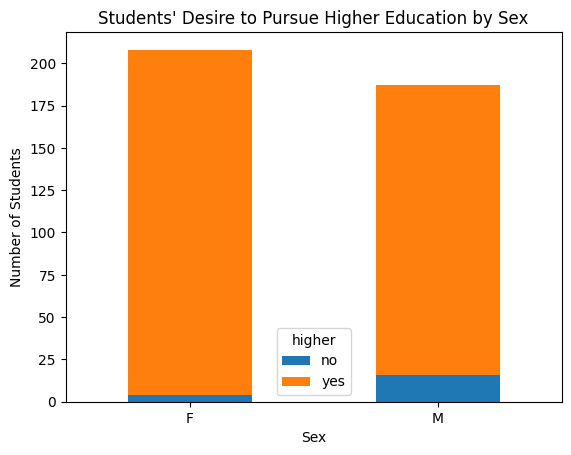

In [38]:
# Chart DataFrame as stacked bar chart
import matplotlib.pyplot as plt

bar_table.plot.bar(stacked = True, rot = 0)
plt.xlabel("Sex")
plt.ylabel("Number of Students")
plt.title("Students' Desire to Pursue Higher Education by Sex")

What is notable about the stacked bar chart is that there appears to be a slightly higher number of male students who do **not** want to take higher education than there are females who don't want to. That's also notable because there are fewer male repondents, so the proportion of "no's" is higher for males.

Now, let's make a side-by-side bar chart to compare participation in extra-curricular activities for students with internet access at home vs. no access at home.

In [43]:
# Use crosstab to get counts in each category
sidebar_table = pd.crosstab(student_data["internet"], student_data["activities"])
print(type(sidebar_table)) # pandas DataFrame
sidebar_table

<class 'pandas.core.frame.DataFrame'>


activities,no,yes
internet,,
no,36,30
yes,158,171


Text(0.5, 1.0, 'Students who Participate in Extra-Curricular Activites')

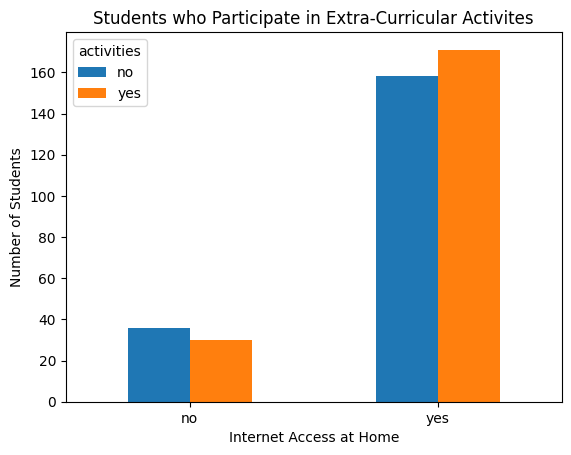

In [46]:
sidebar_table.plot.bar(stacked = False, rot = 0)
plt.xlabel("Internet Access at Home")
plt.ylabel("Number of Students")
plt.title("Students who Participate in Extra-Curricular Activites")

Something interesting about this bar chart is that I had an initial curiosity to see if students without internet access at home would be more inclined to participate in extra-curricular activities since they don't have the distraction at home. What this chart might suggest however, is that the opposite is true, perhaps because students who don't have internet can't afford additional activities outside of school (if they don't have internet due to finances).

### Numeric Variables

First, let's make a histogram of age across a binary variable that indicates whether or not they are in a romantic relationship.

In [51]:
# Create age series' specific to whether or not a student is in a relationship
age_date = student_data.loc[student_data.romantic == "yes", "age"] #series for dating
age_nodate = student_data.loc[student_data.romantic == "no", "age"] #series for not dating

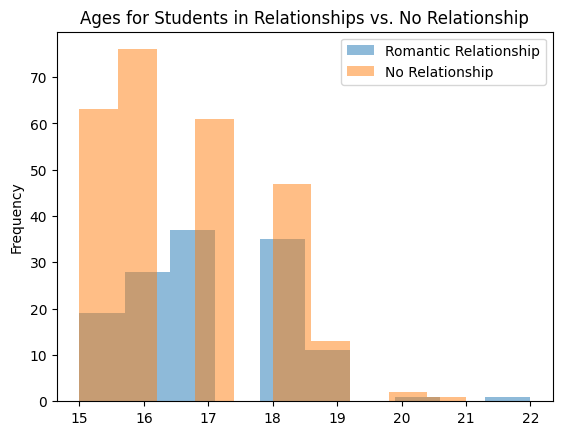

In [64]:
# Use default bins and overlay two histograms with some opacity
age_date.plot.hist(alpha = 0.5, label = "Romantic Relationship",
                   title = "Ages for Students in Relationships vs. No Relationship") \
                   .set(xlabel = "Age")
age_nodate.plot.hist(alpha = 0.5, label = "No Relationship")
plt.legend()

These histograms are not too surprising, since the age distribution for students in relationships seems skewed slightly more to the right, indicating that the students in relationships are slightly older than the ones who are not.

Next, we'll make a kernel density plot of the same variables.

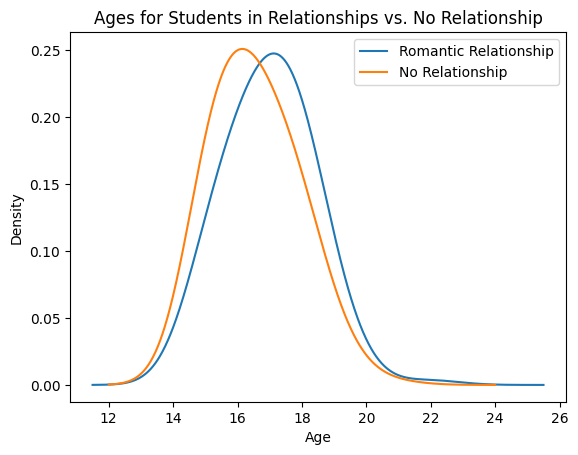

In [74]:
age_date.plot.density(bw_method = 0.7, label = "Romantic Relationship",
                    title = "Ages for Students in Relationships vs. No Relationship") \
                   .set(xlabel = "Age")
age_nodate.plot.density(bw_method = 0.7, label = "No Relationship")
plt.legend()

The kernel density plot allows us to more clearly see the pattern that the age distribution of the students in romantic relationships is slightly older.